# Aprendizaje Supervisado

## Clasificación

En este segundo Notebook vamos a explorar brevemente algunos de los métodos más conocidos y conceptualmente sencillos para aprender y aplicar un sistema de aprendizaje automático para imputar la clase de una muestra.

### Preparación del entorno

Como casi siempre, hay que cargar algunas cositas antes de trabajar.
En este caso vamos a instalar el paquete `mglearn`, complemento del libro
de Müller & Guido que seguimos en el curso.
También vamos a usar el paquete `dtreeviz` para visualización.


In [ ]:
#
# INSTALACIÓN
#
# Esto instala paquetes en la máquina virtual que nos ofrece Google Colab.
#
# paquete con utilidades y código del libro
# de Andreas Müller & Sarah Guido
#
!pip install --quiet mglearn
#
# visualización de árboles de decisión
#
!pip install --quiet dtreeviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00


# Preámbulo

*   Importamos los paquetes en el código (ya instalados anteriormente)
*   Configuramos algunos parámetros de visualización (tamaño de letra, gráficas, et.c)
*   Cargamos datos para experimentar

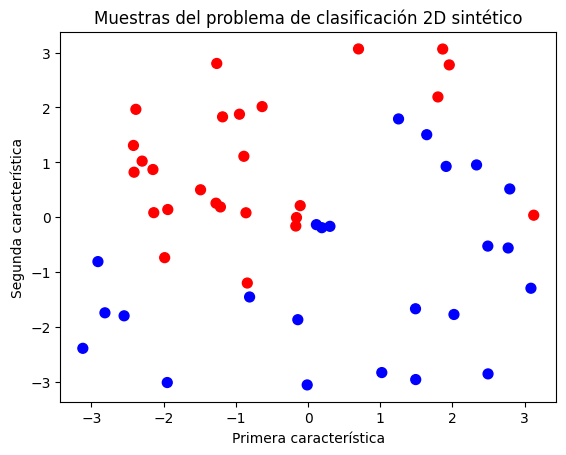

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:

#
# importación
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

def fronteras_sinuosas(num_samples=30,semilla=356):
  rng.seed(semilla)
  X = np.pi*(1-2*rng.rand(num_samples,2))
  y = 1*(X[:,1] > 2*np.sin(X[:,0]))
  return X,y
#
# dataset sintético para clasificación
#
X, y = fronteras_sinuosas(num_samples=50,semilla=3356)

# plot dataset
plt.scatter(X[:,0],X[:,1],s=50,c=y,cmap=cm.bwr)
plt.xlabel("Primera característica")
plt.ylabel("Segunda característica")
plt.title("Muestras del problema de clasificación 2D sintético")
plt.show()

#
# dataset real:
# cancer de mama ('cancer')
#
from sklearn import datasets

cancer = datasets.load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
#
# dataset real:
# especies de iris ('iris)
#
iris = datasets.load_iris()
#X = iris.data
#y = iris.target


# Vecinos más cercanos


Porcentaje de acierto:  0.63


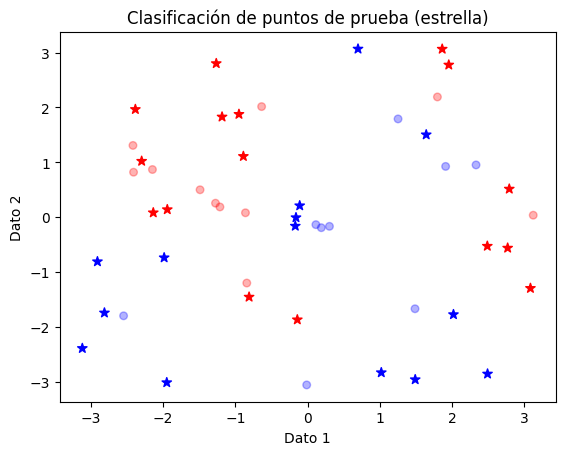

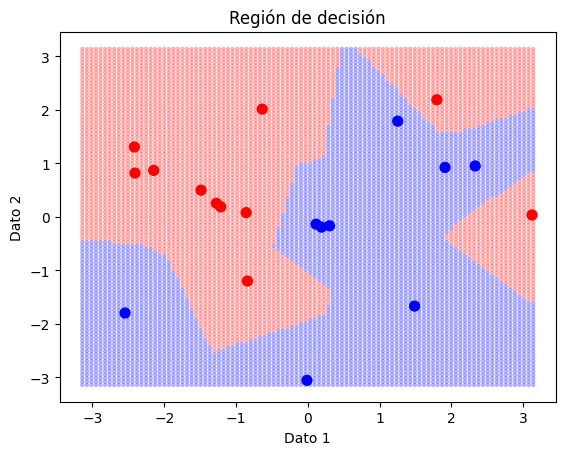

In [ ]:
#
# importamos módulos necesarios para esta parte
#
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
#
# dividimos en conjuntos de entrenamiento y de validación
#
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=20, random_state=1716)
#
# creamos el clasificador de vecinos más cercanos y lo configuramos
# para que use 1 vecino (k=1)
#
K = 1
knn = KNeighborsClassifier(n_neighbors=K)
#
# ajustamos a datos
#
knn = knn.fit(X_train, y_train)
#
# inferimos, imputamos o "predecimos" la clase correspondiente a cada
# punto de validación
#
y_pred_test = knn.predict(X_test)
#
# calculamos índice de desempeño
# es simplemente el porcentaje de aciertos a la clase
#
score = np.sum(y_pred_test == y_test)/len(y_test)
print(f"Porcentaje de acierto: {score:5.2f}")
#
# veamos la clasificación obtenida
#
newcolors = [(*c[:3],0.3) for c in cm.bwr(np.linspace(0, 1, 256))]
bwr_transp = ListedColormap(newcolors)
#plt.scatter(X[:,0],X[:,1],color=(0.0,0.0,0.0,0.25),s=20)
plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train,s=30,cmap=bwr_transp)
plt.scatter(X_test[:,0], X_test[:,1],marker='*',c=y_pred_test,s=50,cmap=cm.bwr)
plt.title('Clasificación de puntos de prueba (estrella)')
plt.xlabel('Dato 1')
plt.ylabel('Dato 2')
plt.show()
#
# mostrar región de clasificación
#
def pintar_regiones(X,y,clasificador,res=100):
  '''
  pintamos la región de decisión
  barremos todo el espacio con una grilla fina y pintamos cada punto
  con la clase asignada.
  '''
  x1s = np.linspace(-np.pi,np.pi,100)
  x2s = np.linspace(-np.pi,np.pi,100)
  ns = len(x1s)*len(x2s)
  X_aux = np.zeros((ns,2))
  i = 0
  for x1 in x1s:
    for x2 in x2s:
      X_aux[i,0] = x1
      X_aux[i,1] = x2
      i += 1
  y_aux = clasificador.predict(X_aux)
  #
  # grilla fina:
  #
  plt.scatter(X_aux[:,0],X_aux[:,1],marker='o',edgecolors='none',c=y_aux,s=10,cmap=bwr_transp)
  #
  # puntos de referencia
  #
  plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=50,cmap=cm.bwr)
  plt.title('Región de decisión')
  plt.xlabel('Dato 1')
  plt.ylabel('Dato 2')
  plt.show()
#
# ejecutamos función
#
pintar_regiones(X_train,y_train,knn)

Porcentaje de acierto:  0.73


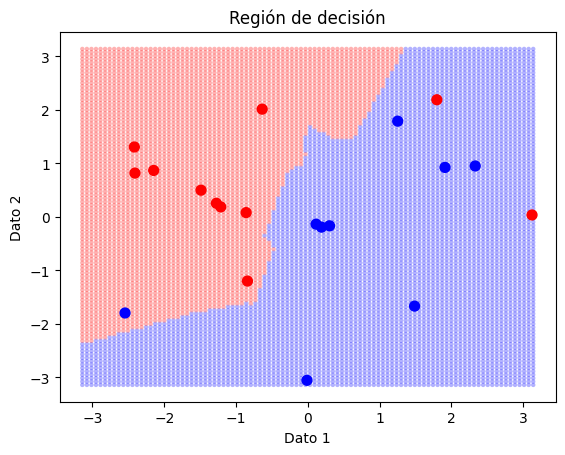

In [ ]:
#
# K = 3
#
K =3
knn = KNeighborsClassifier(n_neighbors=K)
#
# ajustamos a datos
#
knn = knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
#
# calculamos índice de desempeño
#
score = np.sum(y_pred_test == y_test)/len(y_test)
print(f"Porcentaje de acierto: {score:5.2f}")
#
# pintamos
#
pintar_regiones(X_train,y_train,knn)


## Clasificadores lineales

### Regresión logística

A pesar de su nombre, la regresión logística es un método de clasificacion.
La ambigüedad surge de que, si bien _es_ un método de regresión al igual que la regresión lineal que vimos en el notebook anterior, el _objetivo_ de la _Regresión Logística_ es la clasificación, es decir, la variable de respuesta $y$ es una _clase_ y no una magnitud continua, como suele ser el caso de la regresión tradicional.

A pesar de su sencillez, este mecanismo de clasificación es muy versátil, fácil de entender, y efectivo en muchos escenarios.


LOGREG score train: 0.80 test: 0.87


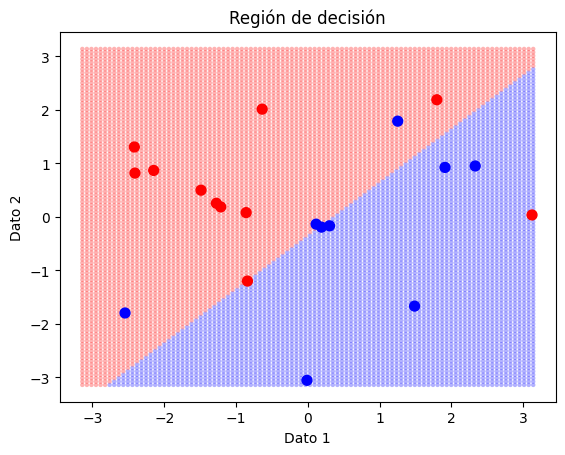

In [ ]:
#
# regresión logística
#
from sklearn.linear_model import LogisticRegression

model       = LogisticRegression(C=0.1,penalty='l2')
model       = model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(f"LOGREG score train: {train_score:.2f} test: {test_score:.2f}")


pintar_regiones(X_train,y_train,model)



## Support Vector Machines

Estos clasificadores lineales, de nombre bastante críptico incluso para expertos, dividen el espacio en regiones mediante un hiperplano (de ahí lo lineal). A diferencia de la regresión logística, sin embargo, el hiperplano no se construye de manera de ajustarse a una respuesta $y$, sino que se utiliza un criterio de _margen de seguridad_. La idea es que la frontera tenga cierto _margen de separación_ con respecto a los puntos de entrenamiento, es decir, se trata de que los puntos de entrenamiento no queden demasiado cerca del borde.
La forma en que esto se hace no es del todo trivial y no aporta mucho explicar aquí cómo funciona. Lo único que importa saber es que el parámetro de _regularización_ en este caso está asociado a la importancia que se le da a este margen en el ajuste a datos.

La forma de aplicar este método es idéntica a otras que vimos antes; sólo hay que cambiar el modelo:


SVC score train: 0.80 test: 0.90


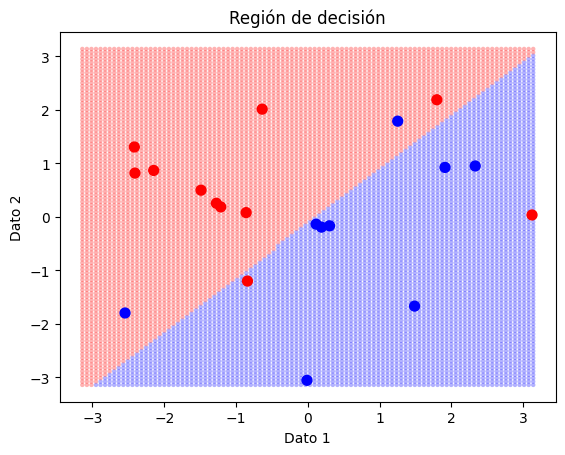

In [ ]:
#
# SVM = Support Vector Machines
# SVC = Support Vector Classifier
#
from sklearn.svm import LinearSVC

model       = LinearSVC(C=0.01,max_iter=100000).fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(f"SVC score train: {train_score:.2f} test: {test_score:.2f}")

pintar_regiones(X_train,y_train,model)

## Árboles de decisión

Estos modelos pueden verse como un juego de preguntas. Para clasificar un dato se realizan una serie de preguntas; la respuesta a cada pregunta determina una bifurcación en un árbol (la primera pregunta corresponde a la raíz del árbol). Una bifurcación puede llevar a otra bifurcación (otra pregunta), o puede ser suficiente para determinar la clase, en cuyo caso se llega a una _hoja_.

Existen diferentes métodos para determinar la secuencia de preguntas que constituye el proceso de clasificación en un modelo de este tipo. Abajo vemos cómo ajustar un árbol para clasificar flores de iris. Una ventaja de este tipo de modelos es que suelen ser fácilmente interpretables por un humano, lo que siempre es deseable.

Al final vemos varias utilidades gráficas para mostrar este tipo de árboles de manera interpretable.


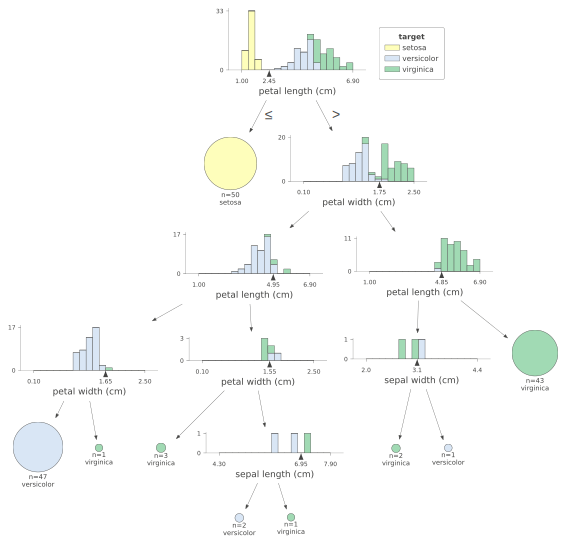

In [ ]:
#
# arboles de decisión
#
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the data data
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
X = iris.data
y = iris.target
model = clf.fit(X, y)

#
# visualizacion con SKLearn
#
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(clf,
#                   feature_names=iris.feature_names,
#                   class_names=iris.target_names,
#                   filled=True)
#
#fig.savefig("decistion_tree.png")
#
# visualizacion básica con Graphviz
#
#print(X.shape)
#import graphviz
#dot_data = tree.export_graphviz(clf, out_file=None,
#                                feature_names=iris.feature_names,
#                                class_names=iris.target_names,
#                                filled=True)
#
# Draw graph
#graph = graphviz.Source(dot_data, format="png")
#graph.render("decision_tree_graphivz")

#
# visualización con dtreeviz
#
# from dtreeviz.trees import dtreeviz # remember to load the package

import dtreeviz

viz_model = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz = viz_model.view()     # render as SVG into internal object

viz.save("decision_tree.svg")

from IPython.display import SVG
SVG("decision_tree.svg")

El resultado del último arbol puede verse aquí:



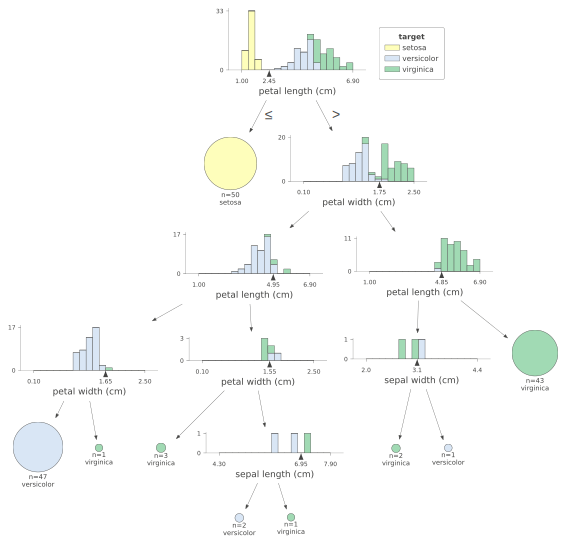

In [ ]:
from IPython.display import SVG
SVG("decision_tree.svg")